In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#定义可视化图像函数
def look_img(img):
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

##### 导入模型

In [13]:
#导入solution
mp_pose = mp.solutions.pose

#导入绘图函数
mp_drawing = mp.solutions.drawing_utils

In [6]:
#mp_pose.Pose?

mediapipe.python.solutions.pose.Pose

In [14]:
#导入模型
pose = mp_pose.Pose(
    static_image_mode=True,         #是静态图片还是连续视频帧
    model_complexity=2,             #选择人体姿势关键点检测模型，0性能差但是快，2性能好但是慢，1介于两者之间
    smooth_landmarks=True,          #是否平滑关键点
    enable_segmentation=True,       #是否人体抠图
    smooth_segmentation=True,
    min_detection_confidence=0.5,   #置信度阈值
    min_tracking_confidence=0.5,    #追踪阈值
)

##### 读入图像

In [15]:
img = cv2.imread('test.jpg')

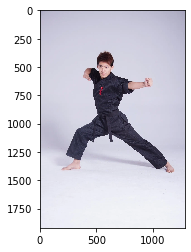

In [16]:
look_img(img)

##### 将图像输入模型，获取预测结果

In [17]:
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

In [18]:
results

mediapipe.python.solution_base.SolutionOutputs

##### 可视化检测结果

In [19]:
mp_drawing.draw_landmarks(img,results.pose_landmarks,mp_pose.POSE_CONNECTIONS)

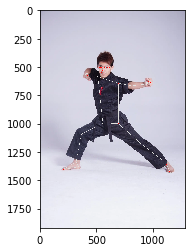

In [20]:
look_img(img)

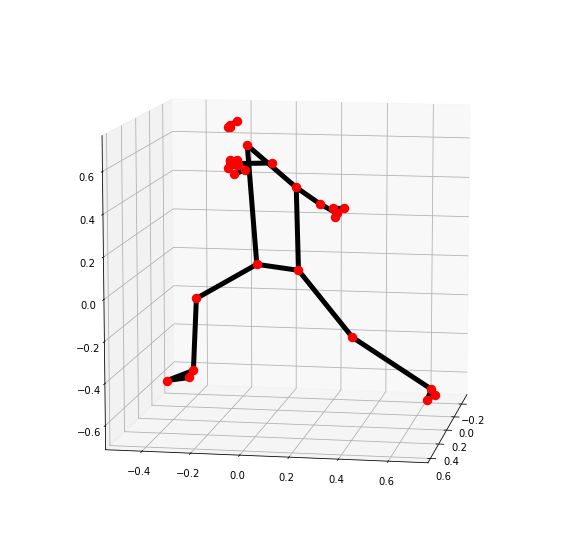

In [22]:
# 在三维真实物理坐标系中可视化以米为单位的检测结果
from mpl_toolkits.mplot3d import Axes3D
mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)

##### 整理代码

In [6]:
import cv2
import mediapipe as mp
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
%matplotlib inline

#定义可视化图像函数
def look_img(img):
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

#导入solution
mp_pose = mp.solutions.pose

#导入绘图函数
mp_drawing = mp.solutions.drawing_utils

#导入模型
pose = mp_pose.Pose(
    static_image_mode=True,         #是静态图片还是连续视频帧
    model_complexity=2,             #选择人体姿势关键点检测模型，0性能差但是快，2性能好但是慢，1介于两者之间
    smooth_landmarks=True,          #是否平滑关键点
    enable_segmentation=True,       #是否人体抠图
    smooth_segmentation=True,
    min_detection_confidence=0.5,   #置信度阈值
    min_tracking_confidence=0.5,    #追踪阈值
)



img = cv2.imread('phone.jpg')
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pose = mp_pose.Pose()
#将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

#可视化
mp_drawing.draw_landmarks(img,results.pose_landmarks,mp_pose.POSE_CONNECTIONS)
look_img(img)
# 在三维真实物理坐标系中可视化以米为单位的检测结果
from mpl_toolkits.mplot3d import Axes3D
mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)

NameError: name 'type_check' is not defined